Library import 

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#this will be usefull to remove outlier easily 
from scipy import stats

Downloading the dataset 

In [2]:
# first dataset containing the original videos 
# df_youtube_videos=pd.read_csv("youtube_videos.tsv",sep="\t")

#second dataset containing a subset of video with input/ouput characteristics and mesured time encoding 
df_transcoding_mesurment=pd.read_csv("transcoding_mesurment.tsv",sep="\t")



1st dataset inspections 

In [11]:
display(df_transcoding_mesurment.head(5))
display(df_transcoding_mesurment.describe())

id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  22508  0.612  
1       240  25164  0.980  
2       360  29228  1.216  
3       480  34316  1.692  
4       720  58528  3.456  

[5 rows x 22 columns]

duration         width        height       bitrate     framerate  \
count  68784.000000  68784.000000  68784.000000  6.878400e+04  68784.000000   
mean     286.413921    624.934171    412.572226  6.937015e+05     23.241321   
std      287.257650    463.169069    240.615472  1.095628e+06      7.224848   
min       31.080000    176.000000    144.000000  8.384000e+03      5.705752   
25%      106.765000    320.000000    240.000000  1.343340e+05     15.000000   
50%      239.141660    480.000000    360.000000  2.911500e+05     25.021740   
75%      379.320000    640.000000    480.000000  6.529670e+05     29.000000   
max    25844.086000   1920.000000   1080.000000  7.628466e+06     48.000000   

                  i              p             b         frames        i_size  \
count  68784.000000   68784.000000  68784.000000   68784.000000  6.878400e+04   
mean     100.868312    6531.692210      9.147854    6641.708377  2.838987e+06   
std       84.764791    6075.871744     92.516177    6153.342453  4.325137e+06   
min        7.000000     175.000000      0.000000     192.000000  1.164800e+04   
25%       39.000000    2374.000000      0.000000    2417.000000  3.933950e+05   
50%       80.000000    5515.000000      0.000000    5628.000000  9.458650e+05   
75%      138.000000    9155.000000      0.000000    9232.000000  3.392479e+06   
max     5170.000000  304959.000000   9407.000000  310129.000000  9.082855e+07   

             p_size   b_size          size     o_bitrate   o_framerate  \
count  6.878400e+04  68784.0  6.878400e+04  6.878400e+04  68784.000000   
mean   2.218057e+07      0.0  2.502294e+07  1.395036e+06     21.190862   
std    5.097306e+07      0.0  5.414402e+07  1.749352e+06      6.668703   
min    3.384500e+04      0.0  1.918790e+05  5.600000e+04     12.000000   
25%    1.851539e+06      0.0  2.258222e+06  1.090000e+05     15.000000   
50%    6.166260e+06      0.0  7.881069e+06  5.390000e+05     24.000000   
75%    1.515506e+07      0.0  1.977335e+07  3.000000e+06     25.000000   
max    7.689970e+08      0.0  8.067111e+08  5.000000e+06     29.970000   

            o_width      o_height           umem         utime  
count  68784.000000  68784.000000   68784.000000  68784.000000  
mean     802.336357    503.825541  228224.717900      9.996355  
std      609.959797    315.970438   97430.878373     16.107429  
min      176.000000    144.000000   22508.000000      0.184000  
25%      320.000000    240.000000  216820.000000      2.096000  
50%      480.000000    360.000000  219480.000000      4.408000  
75%     1280.000000    720.000000  219656.000000     10.433000  
max     1920.000000   1080.000000  711824.000000    224.574000

we can get a first estimate of what the data look like using these method now 

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

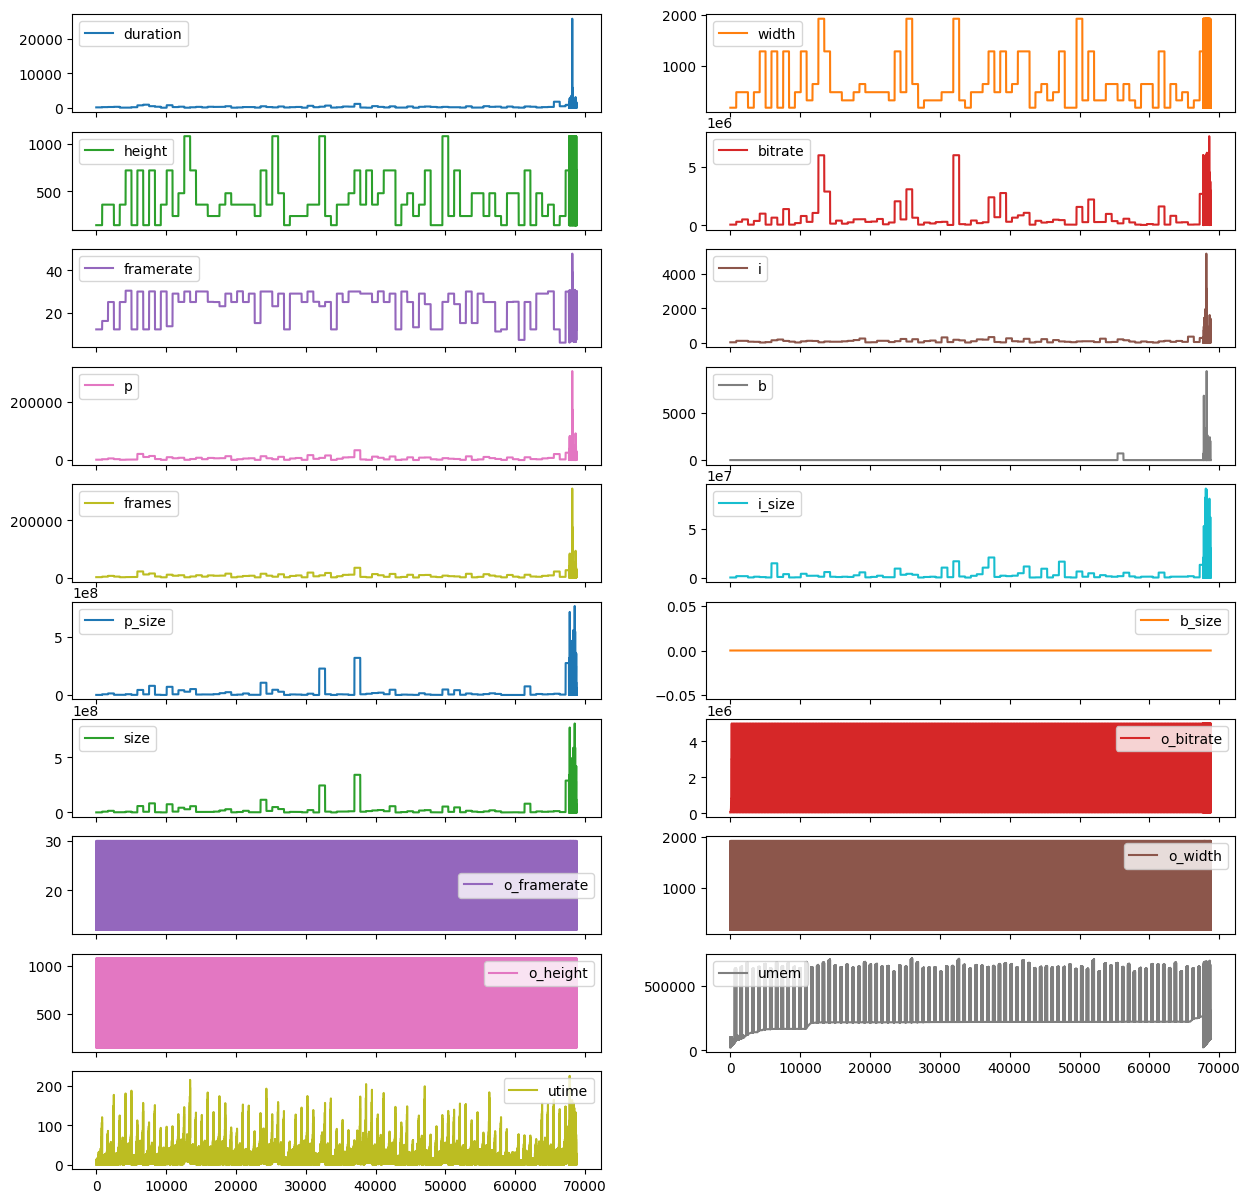

In [4]:
df_transcoding_mesurment.plot(subplots=True, layout=(10,2) ,figsize=(15, 15))

using these plot we don't get that much infomation other than the avergae value and repartion of the data in the dataset however this representation make it easy to 
identify the outliers which can be high in certains cases 

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'bitrate'}>],
       [<AxesSubplot:title={'center':'framerate'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'frames'}>,
        <AxesSubplot:title={'center':'i_size'}>,
        <AxesSubplot:title={'center':'p_size'}>,
        <AxesSubplot:title={'center':'b_size'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'o_bitrate'}>,
        <AxesSubplot:title={'center':'o_framerate'}>,
        <AxesSubplot:title={'center':'o_width'}>],
       [<AxesSubplot:title={'center':'o_height'}>,
        <AxesSubplot:title={'center':'umem'}>,
        <AxesSubplot:title={'center':'utime'}>, <AxesSubplot:>]],
      dtype=object)

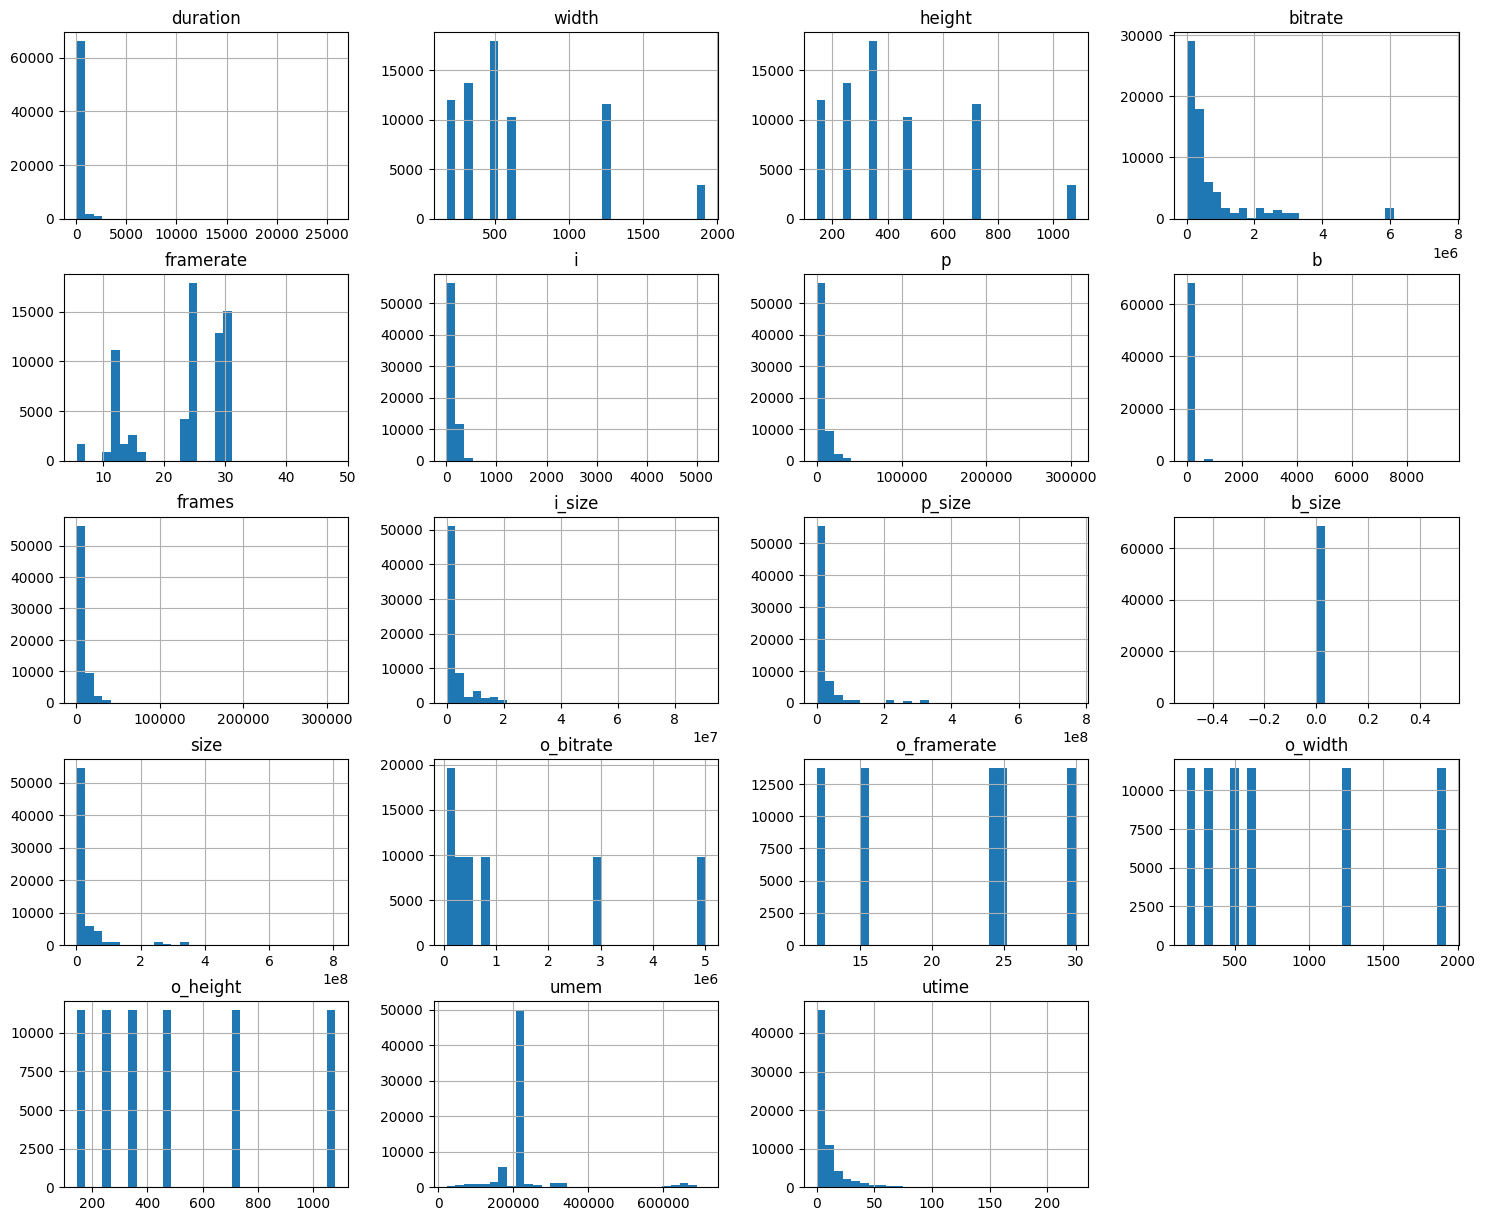

In [7]:
df_transcoding_mesurment.hist(bins=30, figsize=(18, 15))

we will try to plot some of the data without their outlier especialy the columns duration , bitrate and duration
might take some time 

duration         width        height       bitrate     framerate  \
count  60161.000000  60161.000000  60161.000000  6.016100e+04  60161.000000   
mean     248.305763    576.557703    389.358422  5.294654e+05     23.106530   
std      181.223545    408.364876    213.905382  6.648459e+05      7.317867   
min       31.080000    176.000000    144.000000  8.384000e+03      5.705752   
25%       98.683334    320.000000    240.000000  1.047230e+05     15.000000   
50%      217.518000    480.000000    360.000000  2.816420e+05     25.021740   
75%      339.667000    640.000000    480.000000  6.464320e+05     29.000000   
max      916.863340   1920.000000   1080.000000  3.965835e+06     39.000000   

                  i             p             b        frames        i_size  \
count  60161.000000  60161.000000  60161.000000  60161.000000  6.016100e+04   
mean      91.402021   5756.044248      0.000698   5847.446967  2.200624e+06   
std       67.891528   4512.369630      0.171235   4565.548343  2.982998e+06   
min        7.000000    175.000000      0.000000    192.000000  1.164800e+04   
25%       38.000000   2265.000000      0.000000   2318.000000  3.189540e+05   
50%       74.000000   4382.000000      0.000000   4420.000000  8.701360e+05   
75%      113.000000   8170.000000      0.000000   8228.000000  2.821722e+06   
max      354.000000  23950.000000     42.000000  24114.000000  1.459721e+07   

             p_size          size     o_bitrate   o_framerate       o_width  \
count  6.016100e+04  6.016100e+04  6.016100e+04  60161.000000  60161.000000   
mean   1.377736e+07  1.597799e+07  1.380598e+06     21.167582    750.000299   
std    2.098374e+07  2.281195e+07  1.740665e+06      6.669609    575.027419   
min    3.384500e+04  1.918790e+05  5.600000e+04     12.000000    176.000000   
25%    1.603007e+06  2.193902e+06  1.090000e+05     15.000000    320.000000   
50%    5.235193e+06  7.447655e+06  5.390000e+05     24.000000    480.000000   
75%    1.354553e+07  1.753009e+07  3.000000e+06     25.000000   1280.000000   
max    1.429842e+08  1.492508e+08  5.000000e+06     29.970000   1920.000000   

           o_height           umem         utime  
count  60161.000000   60161.000000  60161.000000  
mean     476.981300  208057.760808      7.157709  
std      298.254142   42901.727323      8.681708  
min      144.000000   22508.000000      0.184000  
25%      240.000000  216820.000000      1.944000  
50%      360.000000  219200.000000      3.952000  
75%      720.000000  219656.000000      8.409000  
max     1080.000000  396828.000000     58.304000

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'bitrate'}>],
       [<AxesSubplot:title={'center':'framerate'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'frames'}>,
        <AxesSubplot:title={'center':'i_size'}>,
        <AxesSubplot:title={'center':'p_size'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'o_bitrate'}>,
        <AxesSubplot:title={'center':'o_framerate'}>,
        <AxesSubplot:title={'center':'o_width'}>,
        <AxesSubplot:title={'center':'o_height'}>],
       [<AxesSubplot:title={'center':'umem'}>,
        <AxesSubplot:title={'center':'utime'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

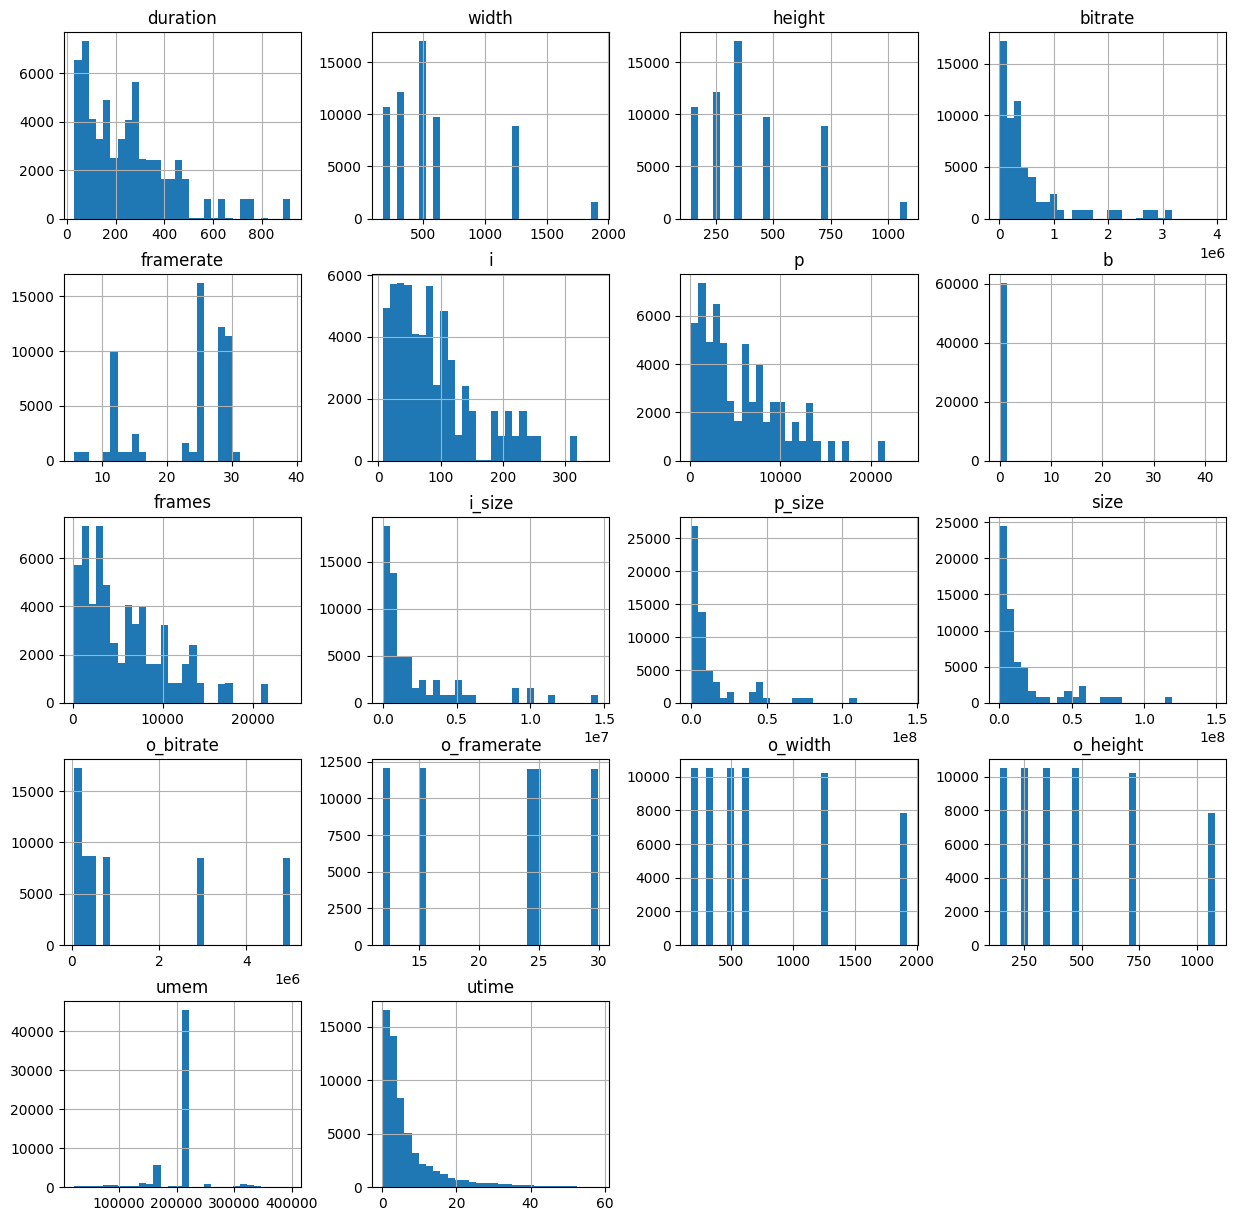

In [17]:

transcoding_numeric = df_transcoding_mesurment.drop(columns=['id','codec','o_codec','b_size']) # we delete the b_size cause the value are all close to zero 
clean_transcoding = transcoding_numeric[(np.abs(stats.zscore(transcoding_numeric)) < 3).all(axis=1)]
display(clean_transcoding.describe())
# fig, axes = plt.subplots(nrows=2, ncols=2)
clean_transcoding.hist(bins=30, figsize=(15, 15))


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

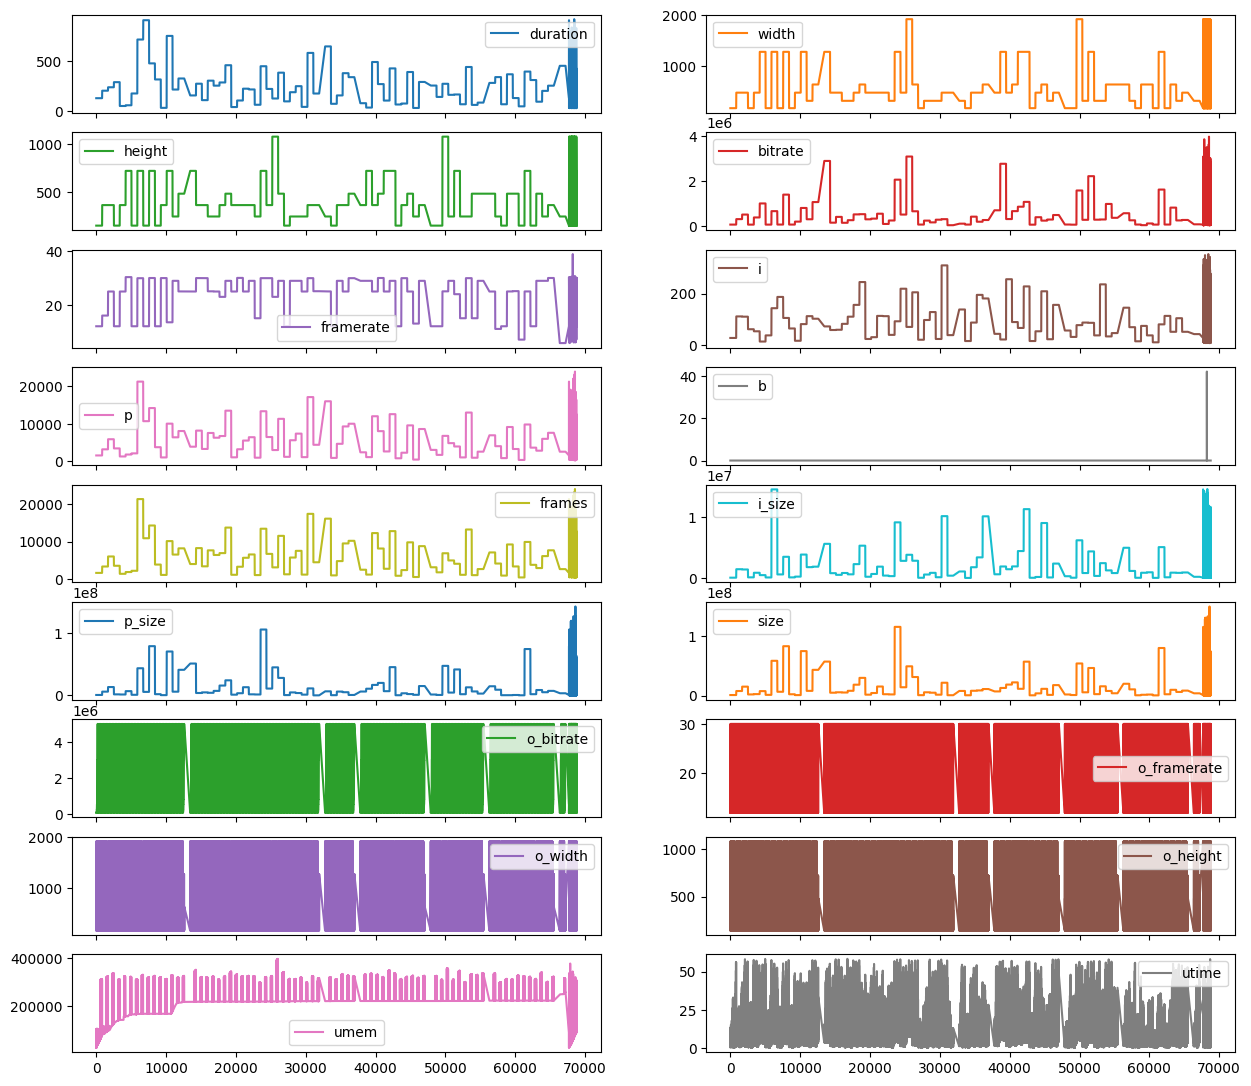

In [18]:
clean_transcoding.plot(subplots=True, layout=(10,2) ,figsize=(15, 15))

we can also get insight in the type of codec for encoding the data accross the dataset 

In [31]:


df_categorie=pd.DataFrame(df_transcoding_mesurment,columns=['codec'])
temp=df_transcoding_mesurment.groupby('codec').size()


fig1=px.bar(temp,
           x=temp.index,
           y=temp, 
           range_x = [0,6],color=temp.index,
           title="Number of Video per type of codec")

fig1.update_layout(xaxis_title="codec", yaxis_title="Number of Video", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=20, uniformtext_mode='hide')



In [30]:

df_categorie=pd.DataFrame(df_transcoding_mesurment,columns=['o_codec'])
temp=df_transcoding_mesurment.groupby('o_codec').size()

fig2=px.bar(temp,
           x=temp.index,
           y=temp, 
           range_x = [0,6],color=temp.index,
           title="Number of Video per type of output codec")

fig2.update_layout(xaxis_title="codec", yaxis_title="Number of Video", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=20, uniformtext_mode='hide')


Now we want to see if there is correlation between the variable 

In [32]:
# df_transcoding_mesurment.columns

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate',
       'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size',
       'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem',
       'utime'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

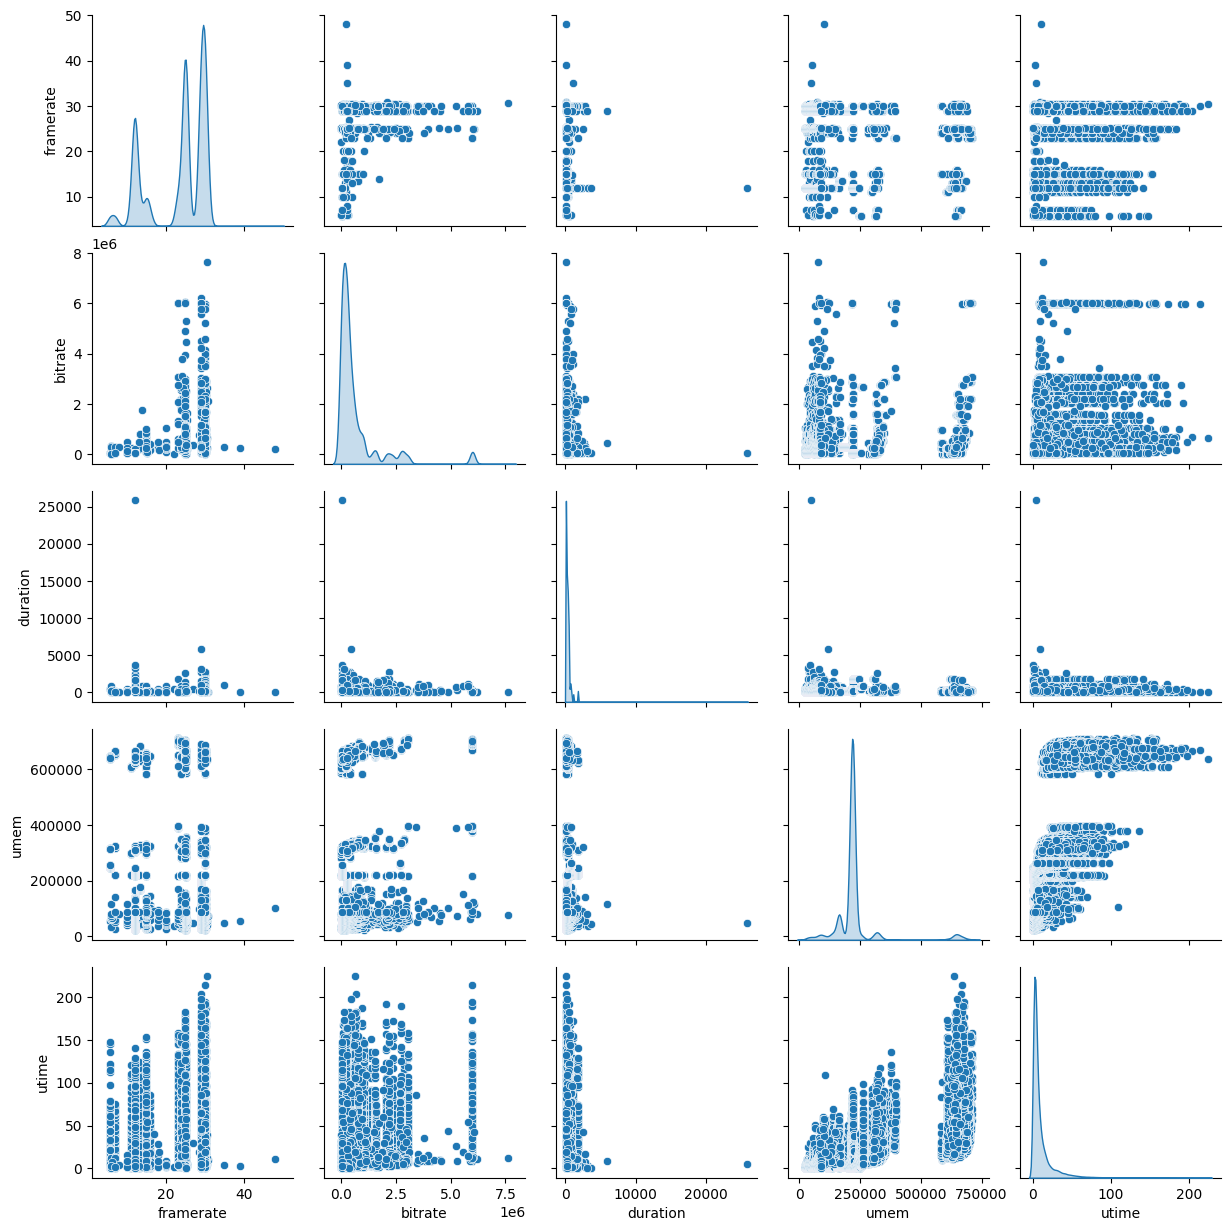

In [34]:
# plt.figure(figsize=(18,18))
# sns.pairplot(data=df_transcoding_mesurment,diag_kind='kde',vars=['framerate','bitrate','duration','umem','utime'])
# plt.show()

<Figure size 1800x1800 with 0 Axes>

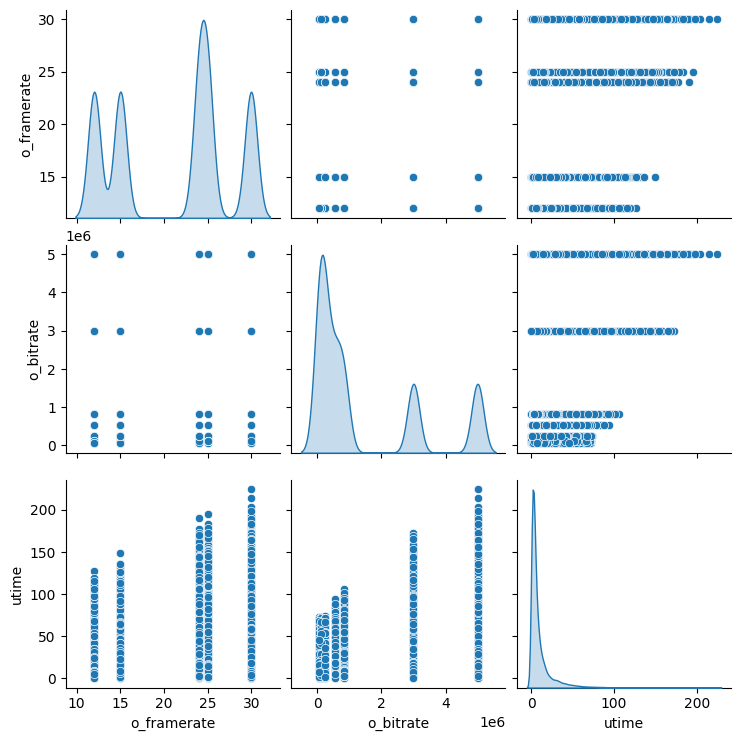

In [35]:
# plt.figure(figsize=(18,18))
# sns.pairplot(data=df_transcoding_mesurment,diag_kind='kde',vars=['o_framerate','o_bitrate','utime'])
# plt.show()

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate',
       'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size',
       'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem',
       'utime'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

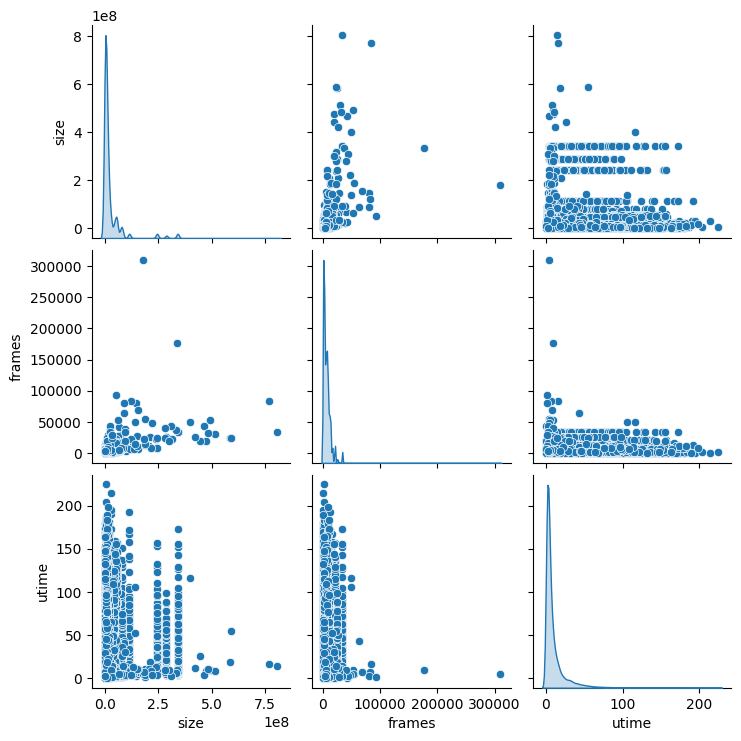

In [36]:
# plt.figure(figsize=(18,18))
# sns.pairplot(data=df_transcoding_mesurment,diag_kind='kde',vars=['size','frames','utime'])
# plt.show()

<AxesSubplot:>

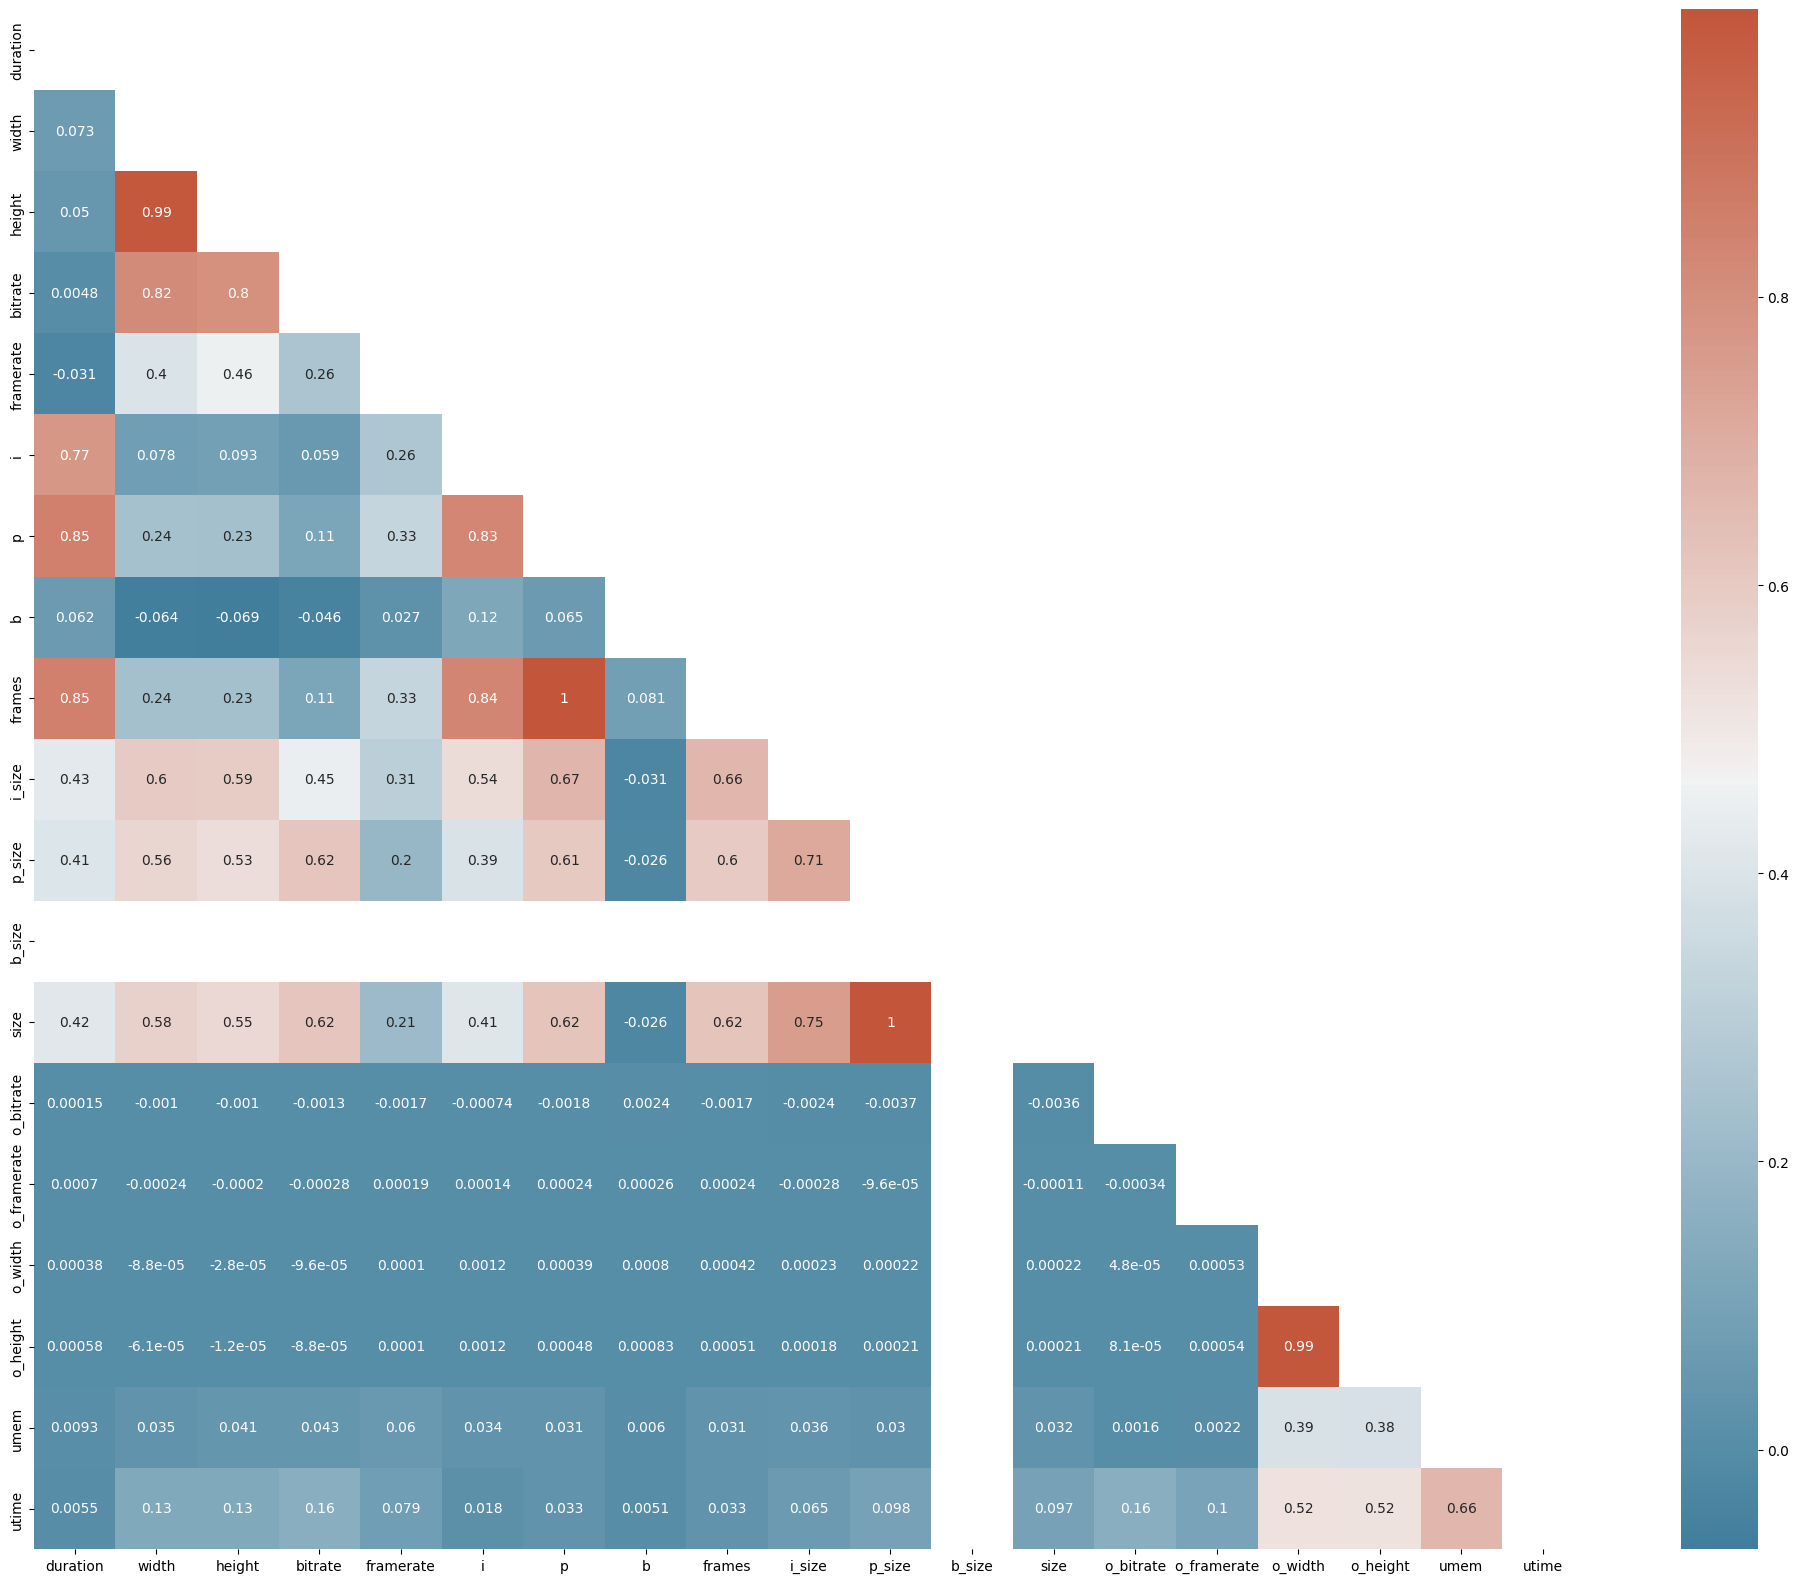

In [38]:
corr = df_transcoding_mesurment.corr()
f, ax = plt.subplots(figsize=(25, 20))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


In [43]:
order =df_transcoding_mesurment.columns.to_list()

C:\Users\hugod\AppData\Local\Temp\ipykernel_15140\3297746590.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<AxesSubplot:>

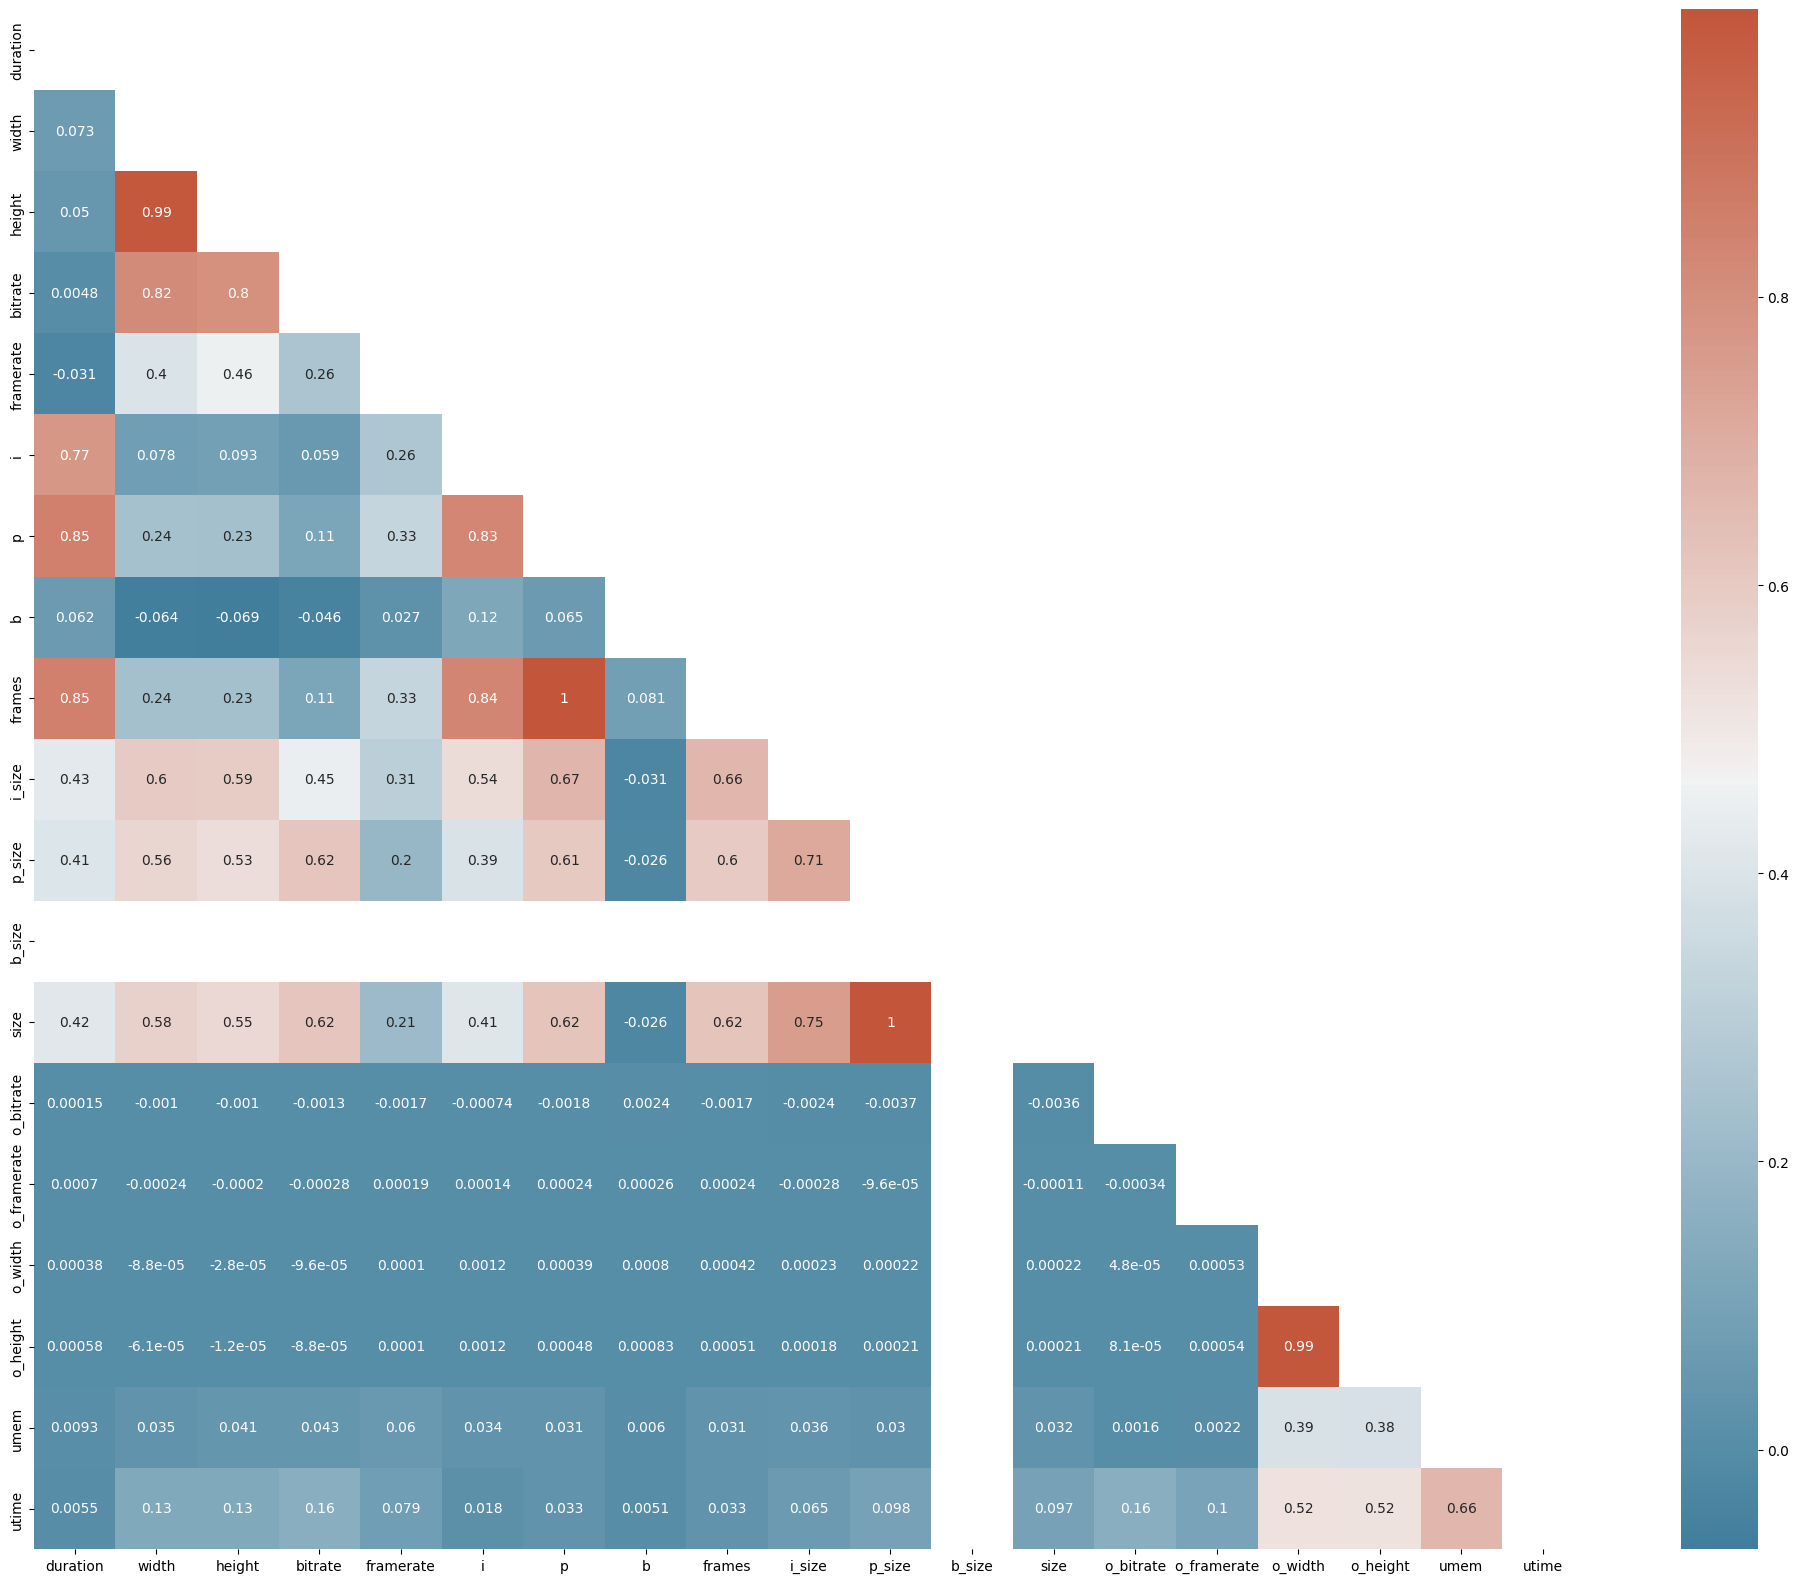

In [44]:
order =df_transcoding_mesurment.columns.to_list()
normalized_df=(df_transcoding_mesurment-df_transcoding_mesurment.mean())/df_transcoding_mesurment.std()
normalized_df =normalized_df[order]

WE PLOT THE EACH NORMALIZED VARIABLE AGAINST EACH OTHER 
this cell is disable as it take time and the output has been saved

<Figure size 1800x1800 with 0 Axes>

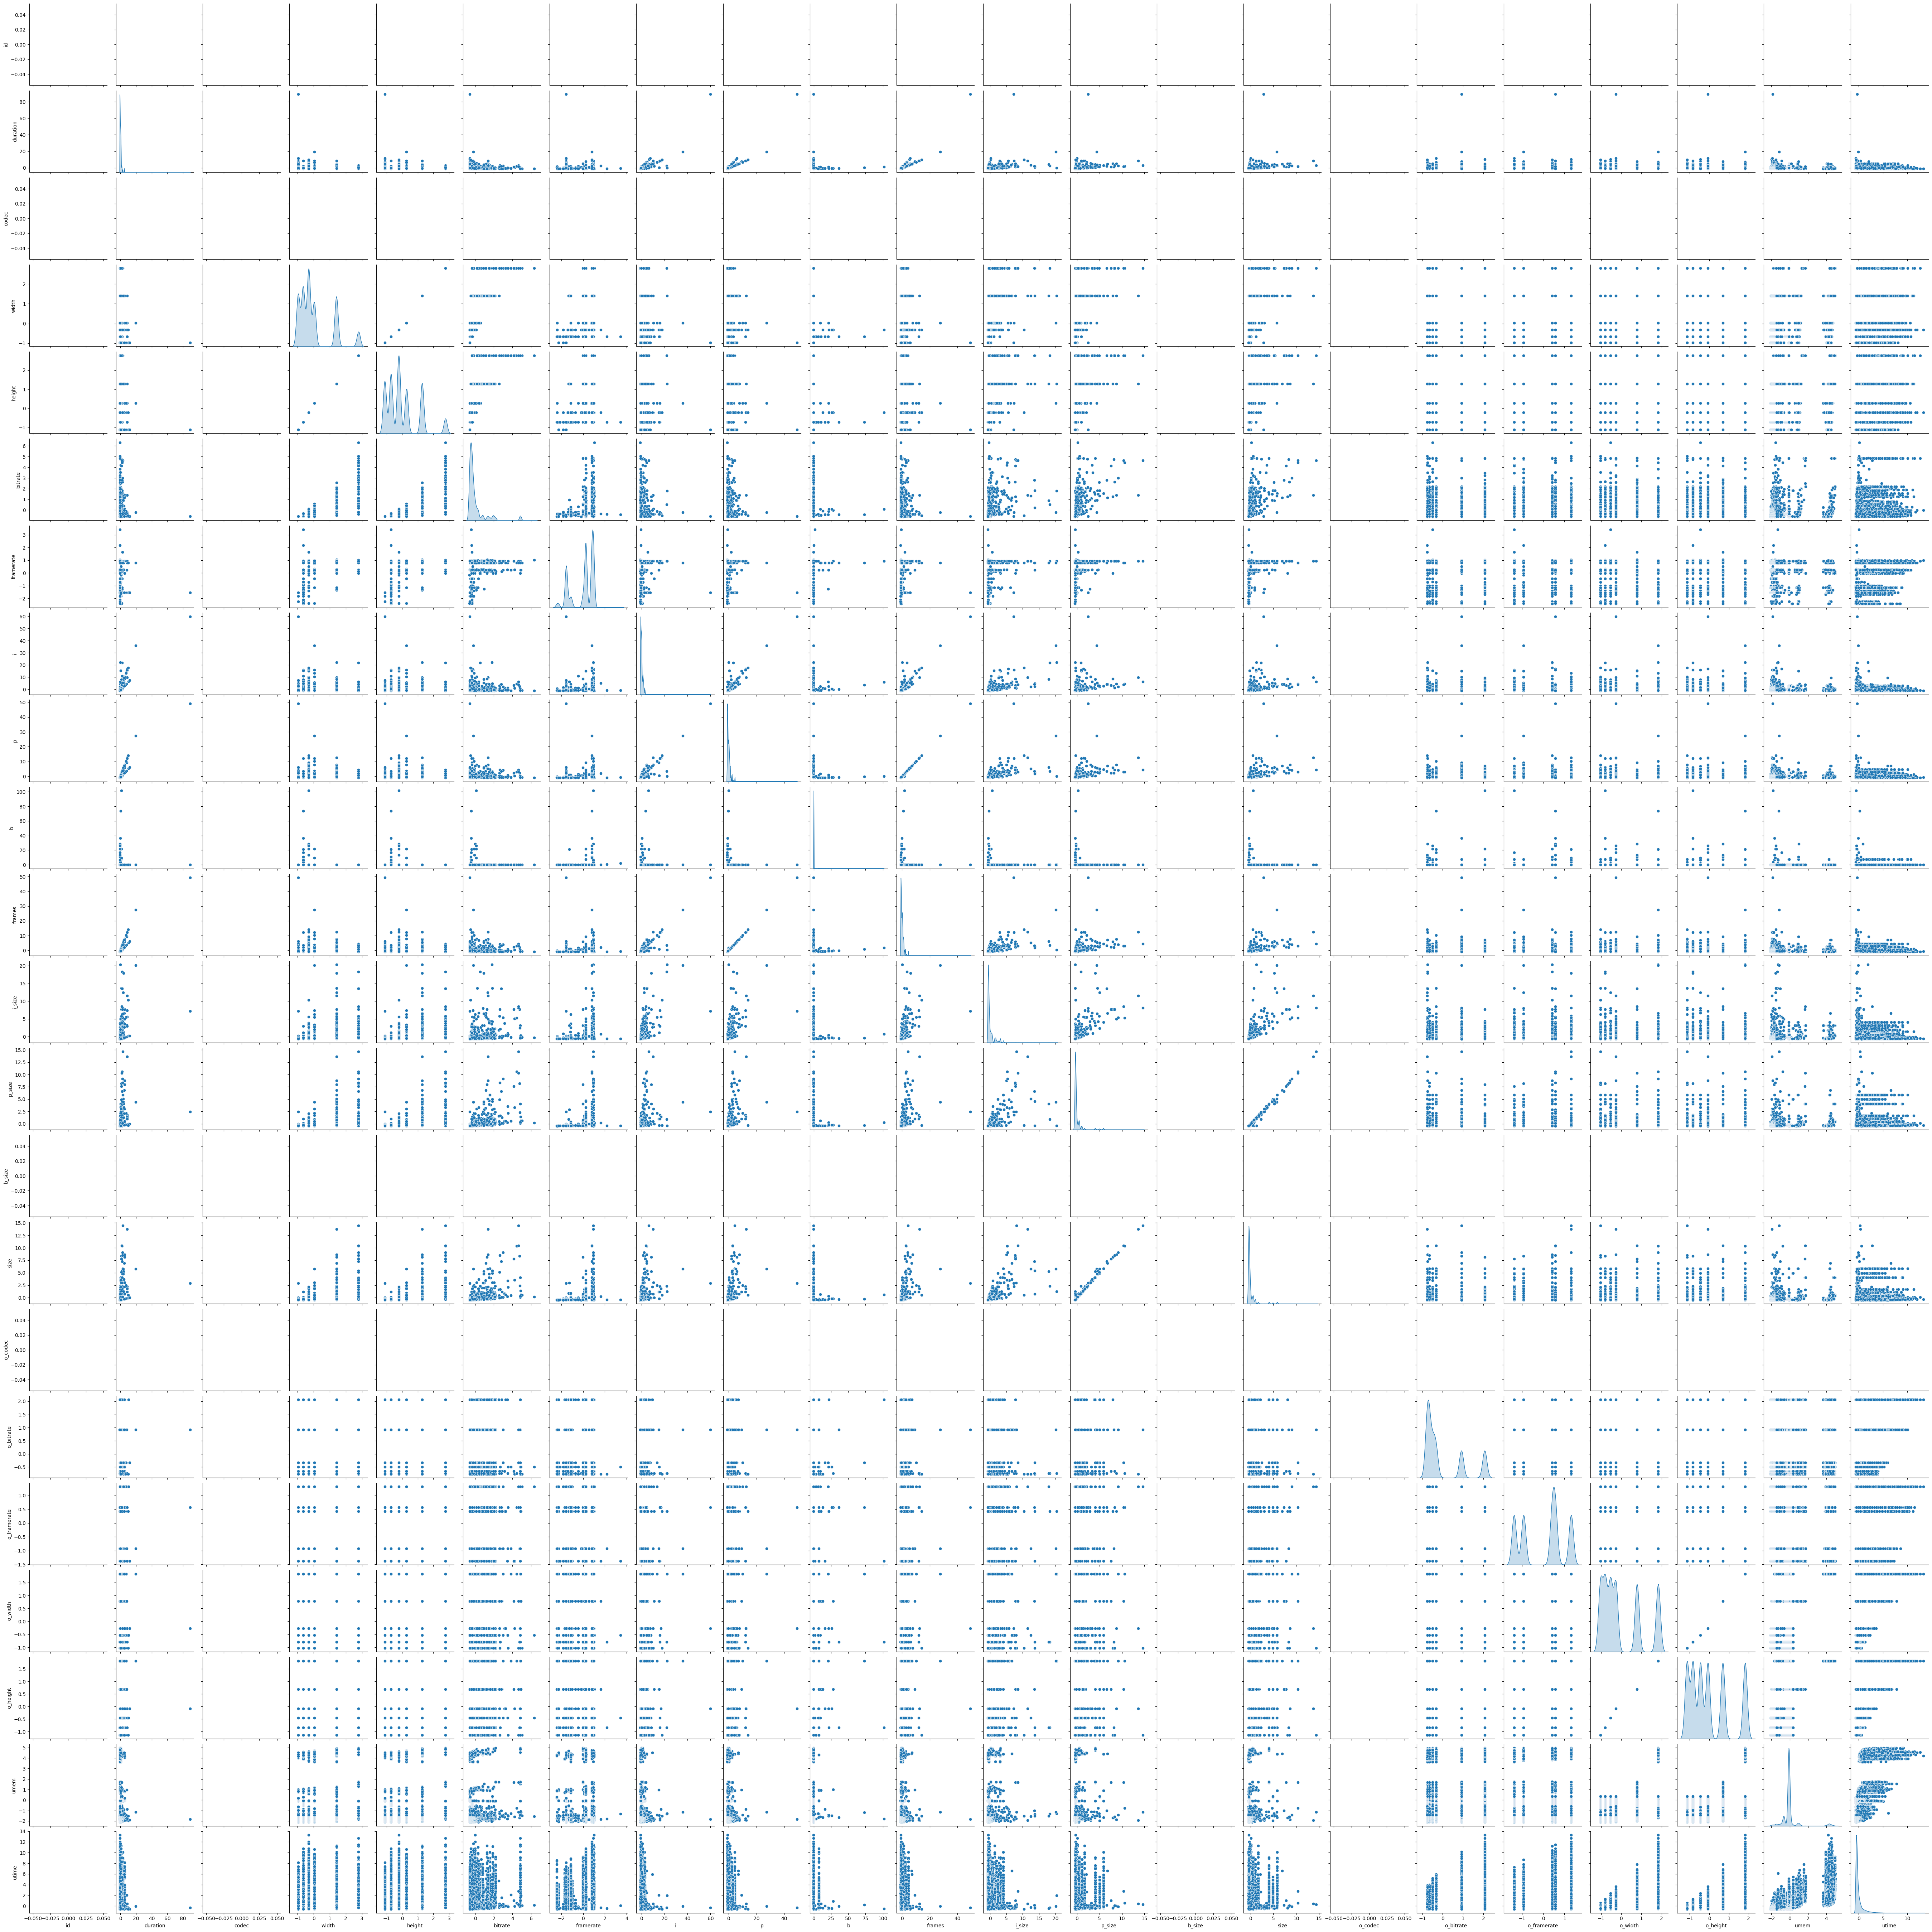

In [46]:
# plt.figure(figsize=(18,18))
# sns.pairplot(data=normalized_df,diag_kind='kde',vars=normalized_df.columns)
# plt.show()

ENCODING AND DATA COMBINATION 
-rename columns with more fitting name 
-delete useless columns providing no information (b_size and id)
-encode caterogical variable (codec ,o_codec) via one hot encoding
-combine variable (Input and Output height and width into Input Output resolution) 



In [47]:
df_transcoding_mesurment.set_axis(['id_video', 'duration', 'codec', 'width_video', 'height_video', 'bitrate', 'framerate','number_i_frames', 'number_p_frames', 'number_b_frames', 'total_frames', 'i_size', 'p_size', 'b_size', 'total_size',      'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'codec_allocated_memory', 'transcoding_time'], axis = 'columns',inplace =True)
# normalized_df.set_axis(['id_video', 'duration', 'codec', 'width_video', 'height_video', 'bitrate', 'framerate','number_i_frames', 'number_p_frames', 'number_b_frames', 'total_frames', 'i_size', 'p_size', 'b_size', 'total_size',      'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'codec_allocated_memory', 'transcoding_time'], axis = 'columns',inplace =True)


In [49]:
df_transcoding_mesurment.drop(['id_video','b_size'], axis=1,inplace=True)
# normalized_df.drop(['id_video','b_size'], axis=1,inplace=True)


In [51]:
try:    
    df_transcoding_mesurment['resolution'] = df_transcoding_mesurment['width_video'] * df_transcoding_mesurment['height_video']
    df_transcoding_mesurment['resolution'].describe()
    df_transcoding_mesurment.drop('width_video', axis=1,inplace=True)
    df_transcoding_mesurment.drop('height_video', axis=1,inplace=True)
    df_transcoding_mesurment
except:
    print("la colonne resolution à déjà été créer")

la colonne height à déjà été créer


In [52]:
try:    
    df_transcoding_mesurment['o_resolution'] = df_transcoding_mesurment['o_width'] * df_transcoding_mesurment['o_height']
    df_transcoding_mesurment['o_resolution'].describe()
    df_transcoding_mesurment.drop('o_width', axis=1,inplace=True)
    df_transcoding_mesurment.drop('o_height', axis=1,inplace=True)
    df_transcoding_mesurment.drop('id_video', axis=1,inplace=True)
except:
    print("la colonne resolution à déjà été créer")



la colonne resolution à déjà été créer


In [54]:
try:
    df_transcoding_mesurment = pd.get_dummies(df_transcoding_mesurment, columns=['codec'])
    df_transcoding_mesurment
    df_transcoding_mesurment = pd.get_dummies(df_transcoding_mesurment, columns=['o_codec'])
    df_transcoding_mesurment
except:
    print('one hot encoding déjà créer')

In [56]:
df_transcoding_mesurment.columns

Index(['duration', 'bitrate', 'framerate', 'number_i_frames',
       'number_p_frames', 'number_b_frames', 'total_frames', 'i_size',
       'p_size', 'total_size', 'o_bitrate', 'o_framerate',
       'codec_allocated_memory', 'transcoding_time', 'resolution',
       'o_resolution', 'codec_flv', 'codec_h264', 'codec_mpeg4', 'codec_vp8',
       'o_codec_flv', 'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8'],
      dtype='object')

In [64]:
new_cols= ['duration', 'bitrate', 'framerate', 'number_i_frames',
       'number_p_frames', 'number_b_frames', 'total_frames', 'i_size',
       'p_size', 'total_size', 'o_bitrate', 'o_framerate',
       'codec_allocated_memory', 'resolution',
       'o_resolution', 'codec_flv', 'codec_h264', 'codec_mpeg4', 'codec_vp8',
       'o_codec_flv', 'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8', 'transcoding_time']


<AxesSubplot:>

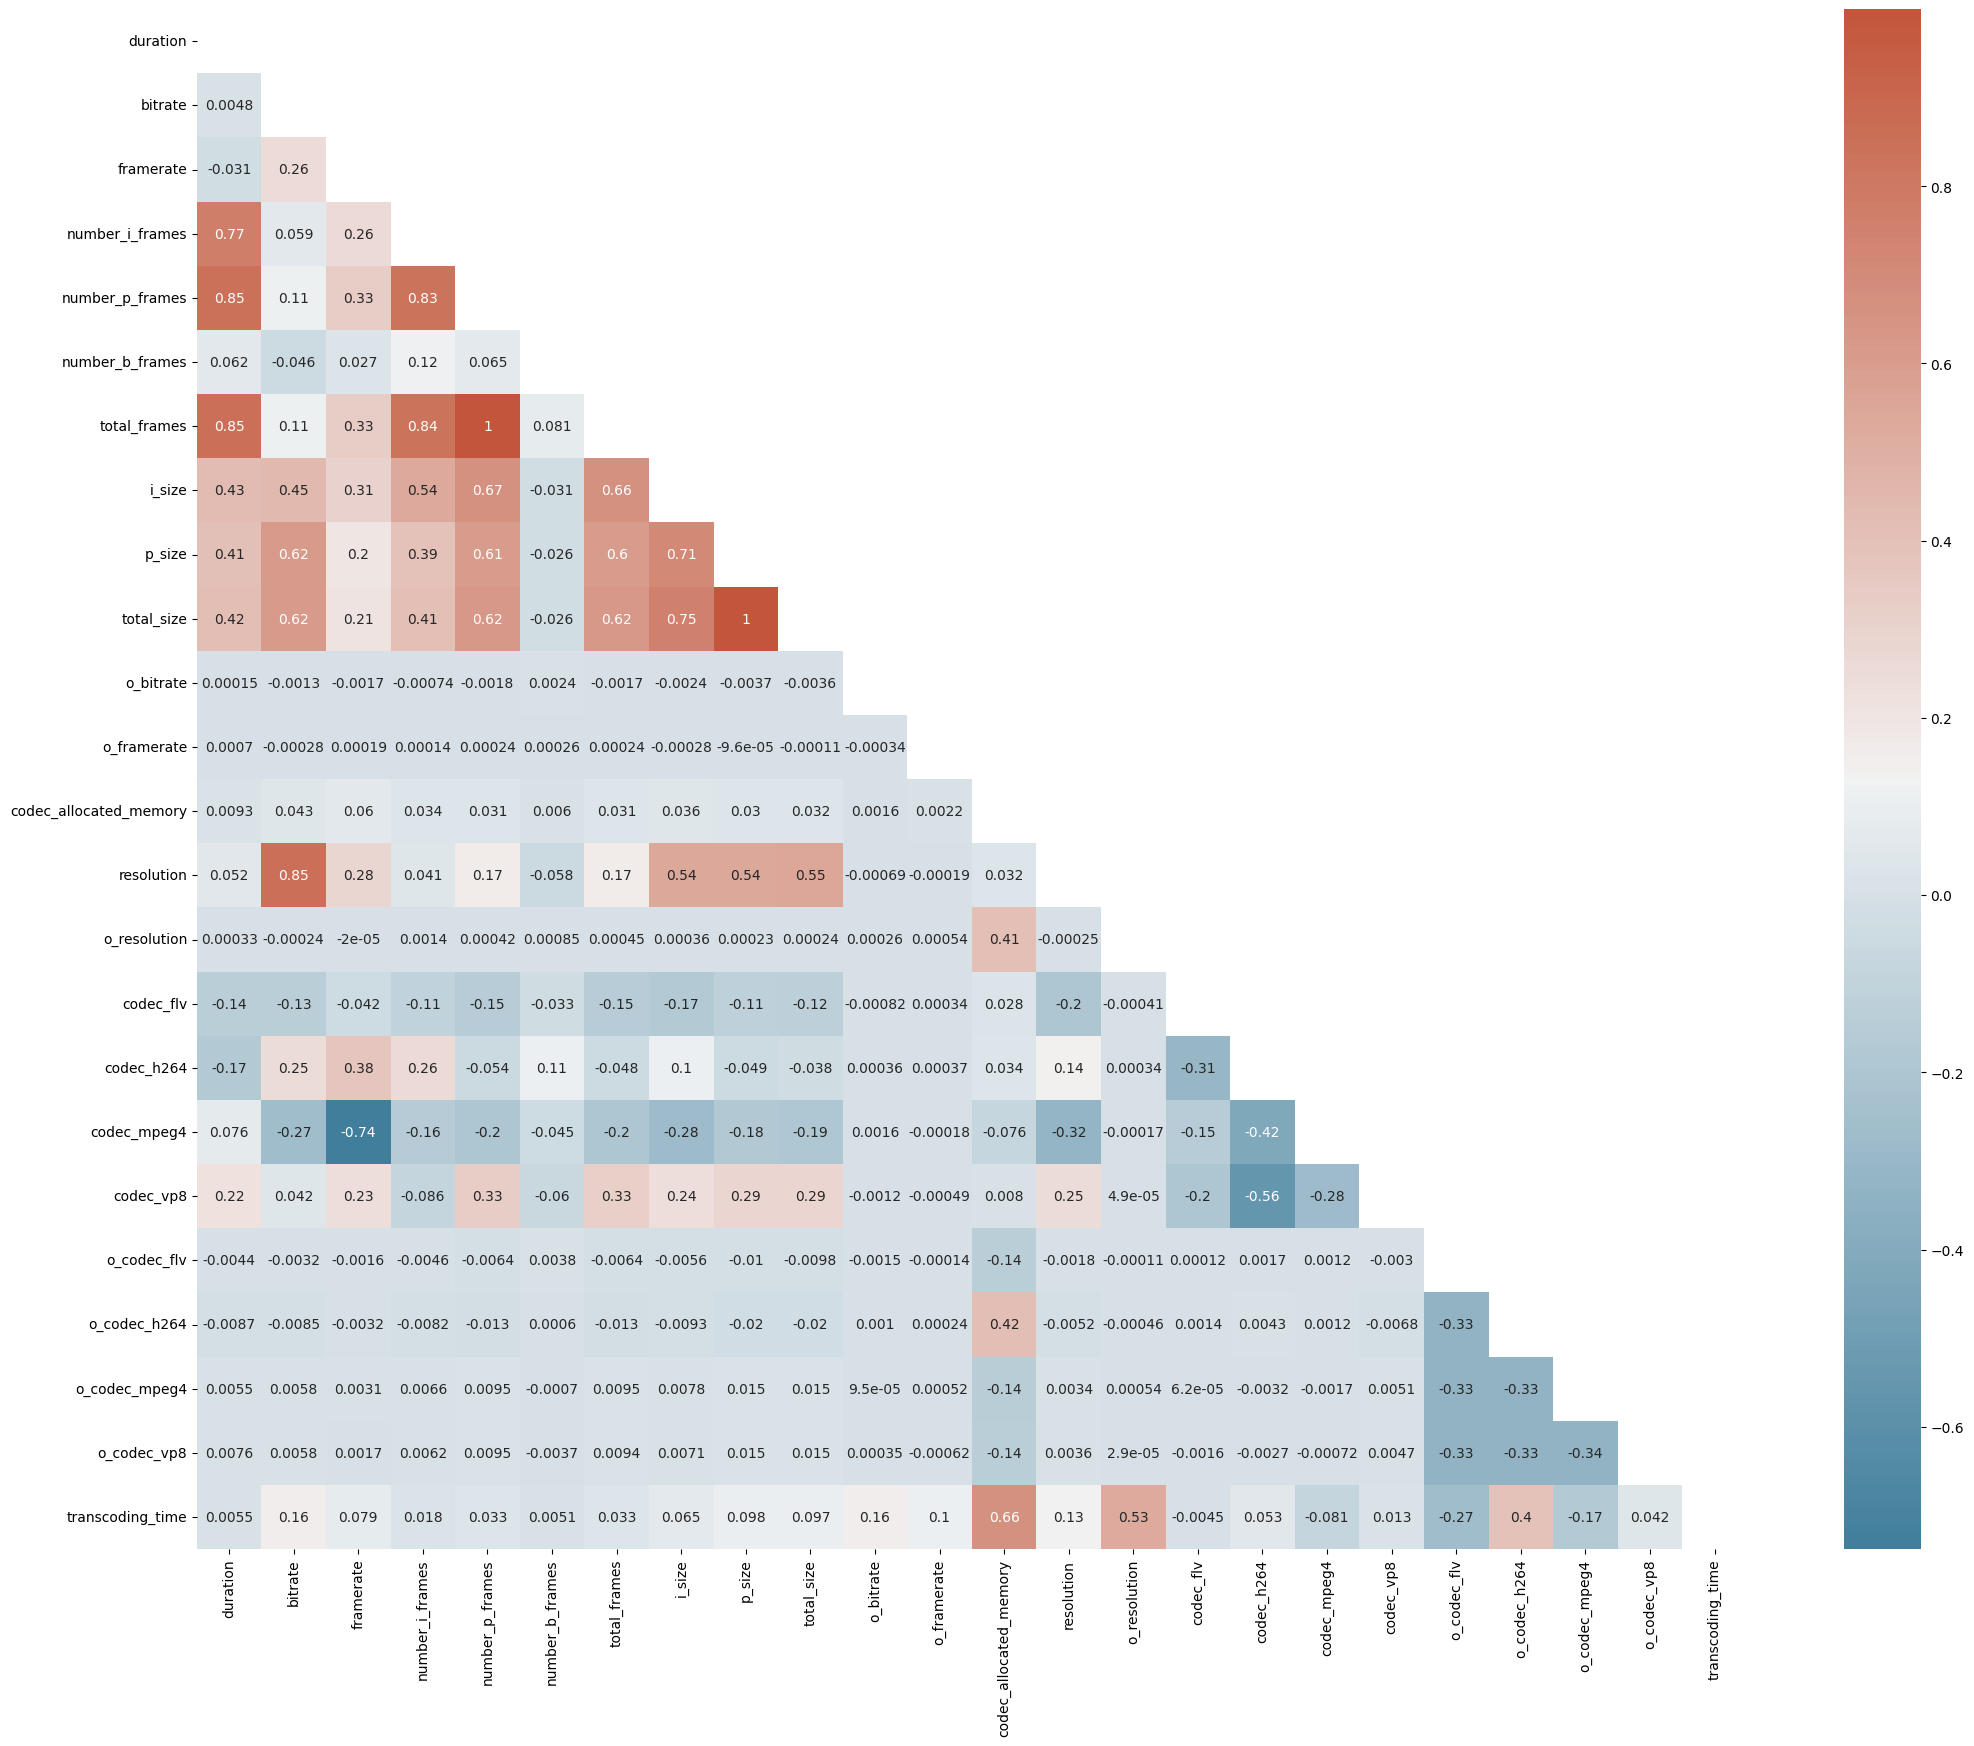

In [65]:
df_transcoding_mesurment =df_transcoding_mesurment[new_cols]

corr3 = df_transcoding_mesurment.corr()
f, ax = plt.subplots(figsize=(25, 20))
mask = np.triu(np.ones_like(corr3, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr3, annot=True, mask = mask, cmap=cmap)

In [66]:


order =df_transcoding_mesurment.columns.to_list()
pre_process_normalized=(df_transcoding_mesurment-df_transcoding_mesurment.mean())/df_transcoding_mesurment.std()
pre_process_normalized =pre_process_normalized[order]

<Figure size 1800x1800 with 0 Axes>

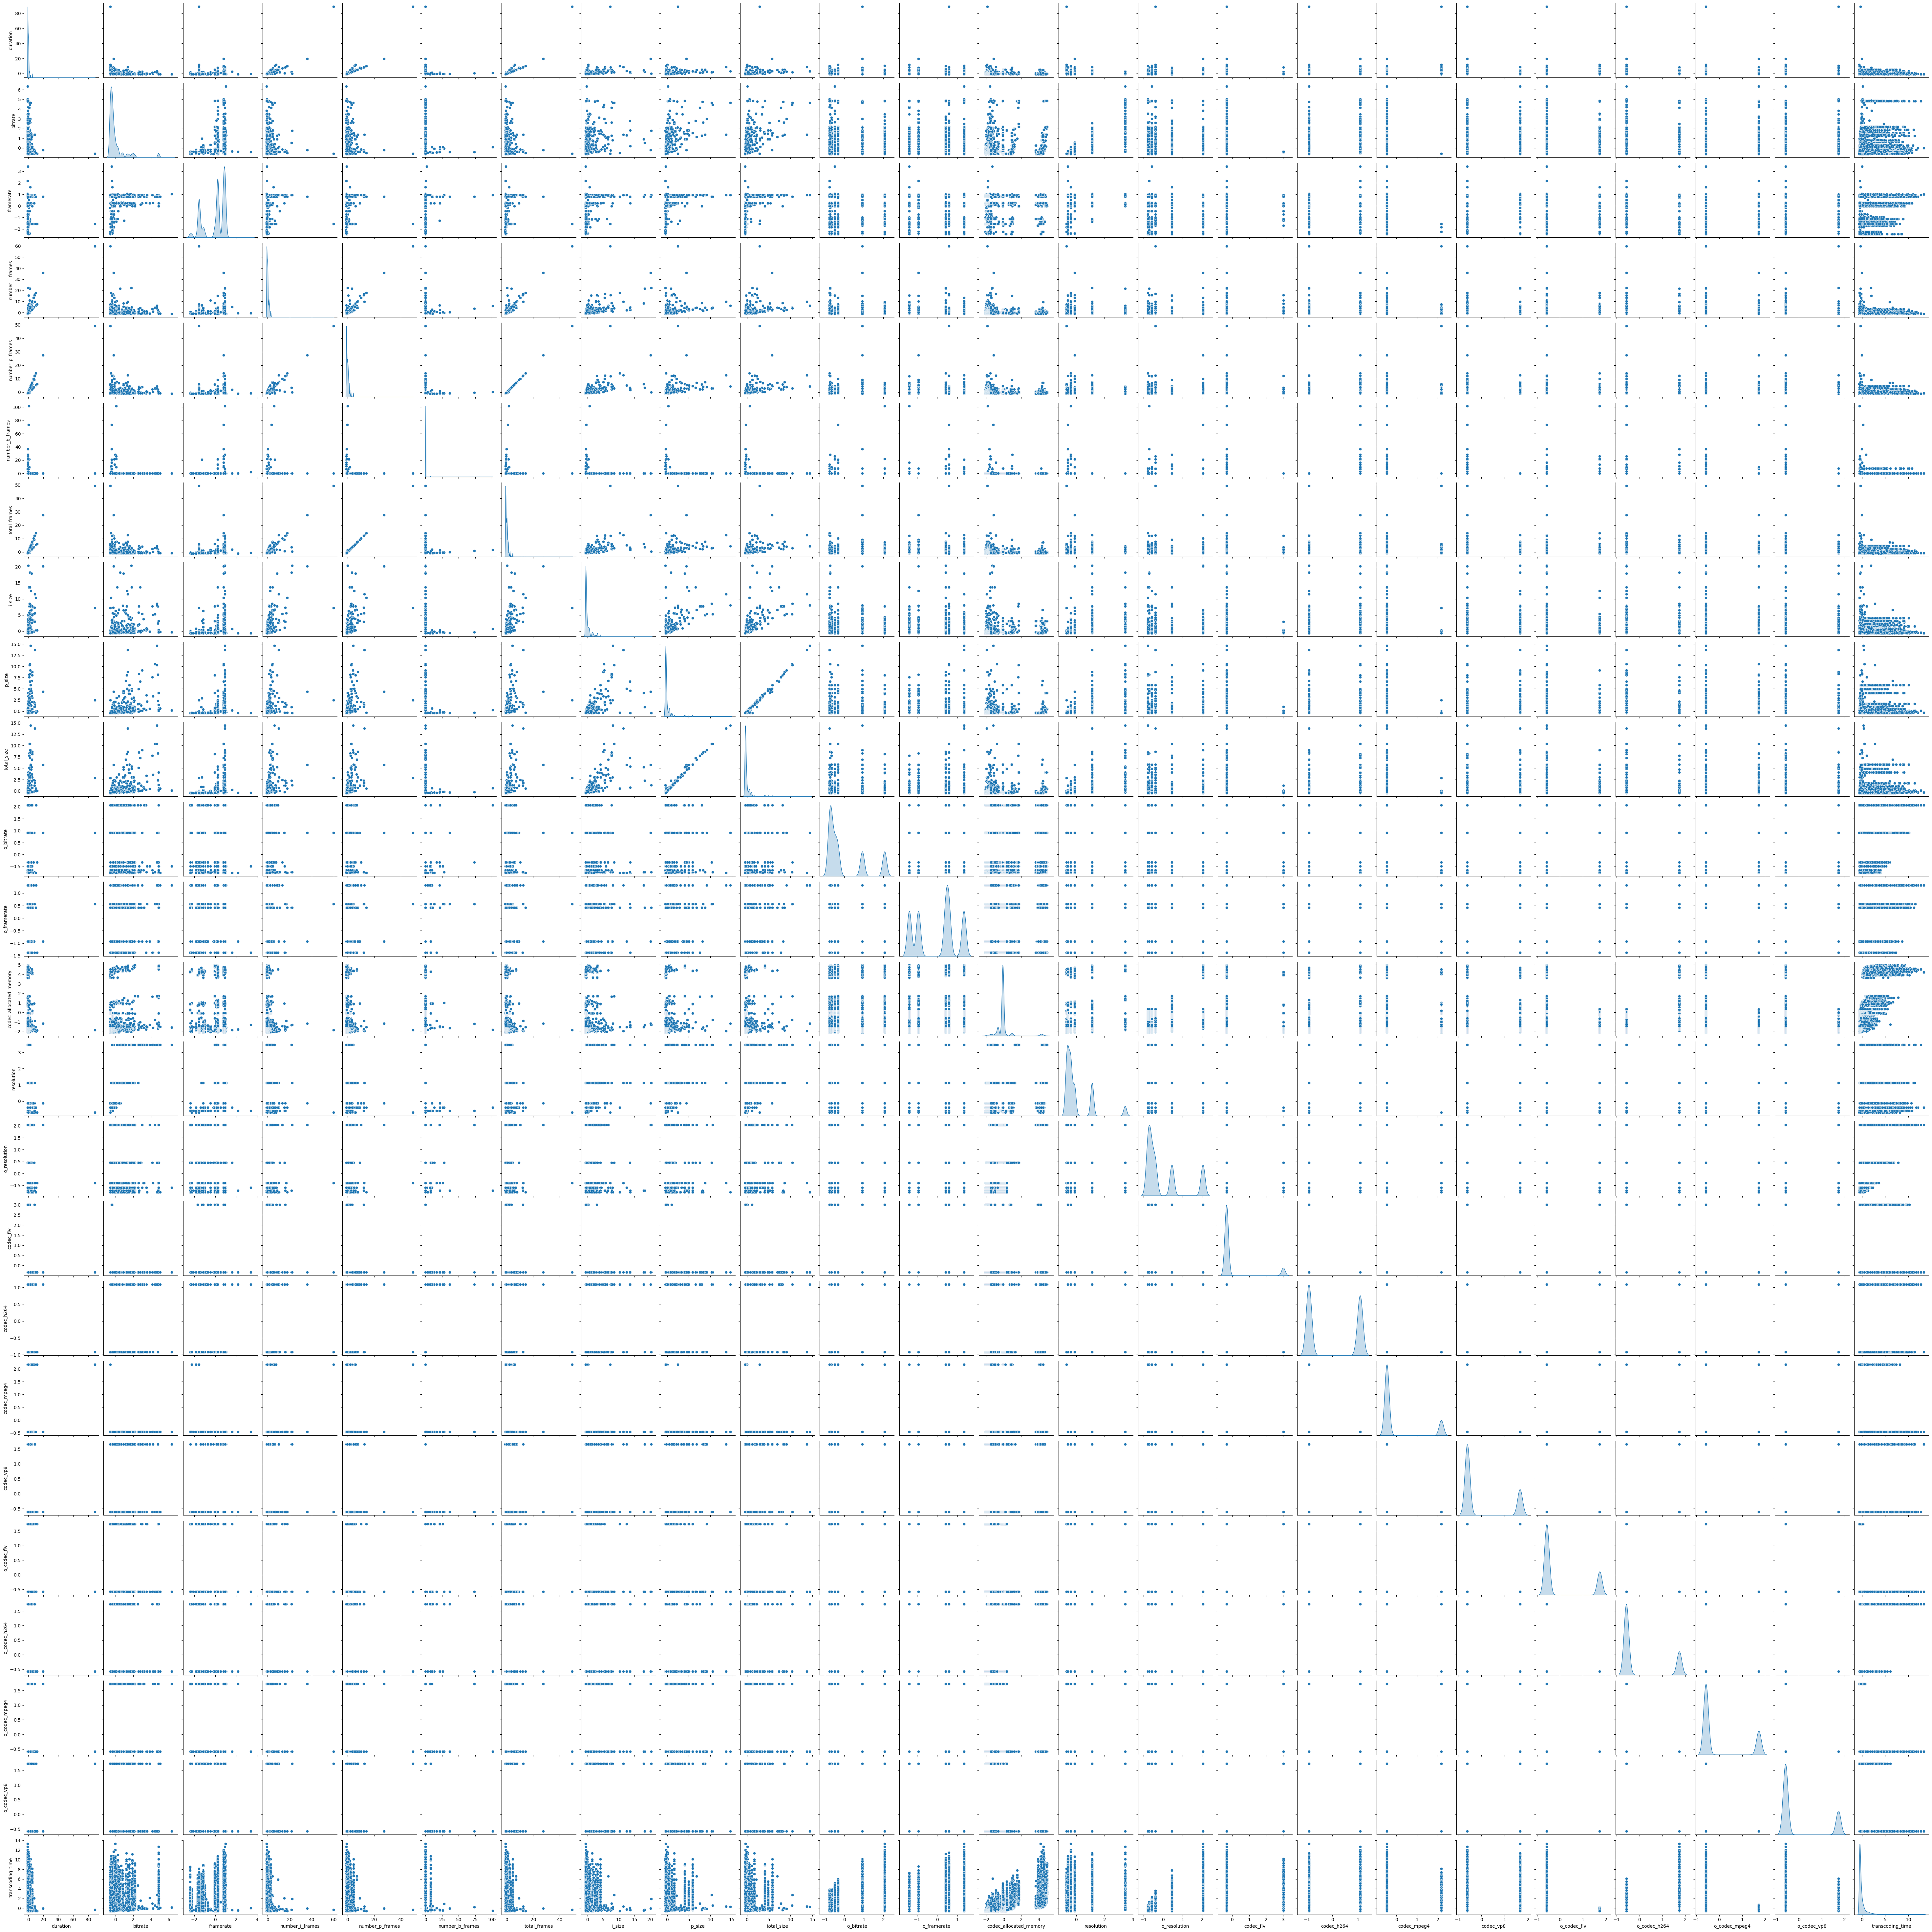

In [68]:
plt.figure(figsize=(18,18))
sns.pairplot(data=pre_process_normalized,diag_kind='kde',vars=pre_process_normalized.columns)
plt.show()